In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
model_metadata = pd.read_csv("../../config/models.csv")
palette = model_metadata.set_index("description")["color"].to_dict()
model_renaming = model_metadata.set_index("name")["description"].to_dict()
model_metadata

,name,description,color
0,CADD,CADD,C0
1,GPN-MSA,GPN-MSA,C1
2,Borzoi,Borzoi,C2
3,Enformer,Enformer,C3
4,GPN,gLM-Promoter,C4
5,NucleotideTransformer,NT,C5
6,HyenaDNA,HyenaDNA,C6
7,Caduceus,Caduceus,C7
8,CADD+GPN-MSA+Borzoi,Ensemble,C8
9,Sei,Sei,C9


In [25]:
dataset_renaming = {
    "mendelian_traits_proximal_matched_1": "Mendelian traits\n(proximal)\nAUROC",
    "mendelian_traits_distal_matched_1": "Mendelian traits\n(distal)\nAUROC",

    "complex_traits_proximal_matched_1": "Complex traits\n(proximal)\nAUROC",
    "complex_traits_distal_matched_1": "Complex traits\n(distal)\nAUROC",

    "eqtl_proximal_matched_1": "eQTL\n(proximal)\nAUROC",
    "eqtl_distal_matched_1": "eQTL\n(distal)\nAUROC",

    "dsqtl_distal_matched_1": "dsQTL\n(distal)\nAUROC",

    "sat_mut_mpra_proximal": "SatMutMPRA\n(proximal)\nSpearman",
    "sat_mut_mpra_distal": "SatMutMPRA\n(distal)\nSpearman",
}

subset_renaming = {
    "all": "All",
}

In [26]:
datasets = [
    ["mendelian_traits_proximal_matched_1", "AUROC", "gene"],
    ["mendelian_traits_distal_matched_1", "AUROC", "gene"],

    ["complex_traits_proximal_matched_1", "AUROC", "gene"],
    ["complex_traits_distal_matched_1", "AUROC", "gene"],

    ["eqtl_proximal_matched_1", "AUROC", "gene"],
    ["eqtl_distal_matched_1", "AUROC", "gene"],

    ["dsqtl_distal_matched_1", "AUROC", "gene"],

    ["sat_mut_mpra_proximal", "Spearman", "element"],
    ["sat_mut_mpra_distal", "Spearman", "element"],
]

subsets = [
    "all",
]

modalities = [
    "Zero-shot",
    #"Linear probing",
]

models = [
    "CADD",
    "GPN-MSA",
    "Enformer",
    #"Borzoi",
    #"GPN",
    #"NucleotideTransformer",
    #"HyenaDNA",
    #"Caduceus",
    #"Sei",
    "GPN_final",
]

def get_model_path(model, modality, dataset, subset, metric, block):
    if modality == "Linear probing":
        predictor = f"{model}.LogisticRegression.chrom"
    elif modality == "Zero-shot":
        if model == "CADD":
            predictor = "CADD.plus.RawScore"
        elif model == "Sei":
            predictor = "Sei.plus.seqclass_max_absdiff"
        elif model in ["Enformer", "Borzoi"]:
            predictor = f"{model}_L2_L2.plus.all"
        elif model == "GPN_final":
            print("Using euclidean distance for GPN, for now")
            predictor = "GPN_final_EuclideanDistance.plus.score"
        else:
            if "mendelian" in dataset:
                llr_version = "LLR"
                sign = "minus"
            else:
                llr_version = "absLLR"
                sign = "plus"
            predictor = f"{model}_{llr_version}.{sign}.score"
    return f"../../results/dataset/{dataset}/{metric}_by_{block}_weighted_average/{subset}/{predictor}.csv"

In [35]:
rows = []
for dataset, metric, block in datasets:
    for subset in subsets:
        for modality in modalities:
            for model in models:
                #if model == "CADD" and "mendelian" in dataset:
                #    continue
                #if model == "GPN_final" and "distal" in dataset:
                #    continue
                path = get_model_path(model, modality, dataset, subset, metric, block)
                df = pd.read_csv(path).iloc[0]
                rows.append([
                    dataset_renaming.get(dataset, dataset),
                    subset_renaming.get(subset, subset),
                    modality,
                    model_renaming.get(model, model),
                    df["score"],
                    df["se"]]
                )
df = pd.DataFrame(rows, columns=["dataset", "subset", "modality", "model", "metric", "se"])
df

Using euclidean distance for GPN, for now
Using euclidean distance for GPN, for now
Using euclidean distance for GPN, for now
Using euclidean distance for GPN, for now
Using euclidean distance for GPN, for now
Using euclidean distance for GPN, for now
Using euclidean distance for GPN, for now
Using euclidean distance for GPN, for now
Using euclidean distance for GPN, for now


,dataset,subset,modality,model,metric,se
0,Mendelian traits\n(proximal)\nAUROC,All,Zero-shot,CADD,0.808333,0.069950
1,Mendelian traits\n(proximal)\nAUROC,All,Zero-shot,GPN-MSA,0.869444,0.058874
2,Mendelian traits\n(proximal)\nAUROC,All,Zero-shot,Enformer,0.883333,0.056768
3,Mendelian traits\n(proximal)\nAUROC,All,Zero-shot,gLM-Promoter,0.841667,0.080993
4,Mendelian traits\n(distal)\nAUROC,All,Zero-shot,CADD,0.941176,0.038915
5,Mendelian traits\n(distal)\nAUROC,All,Zero-shot,GPN-MSA,0.895221,0.062726
6,Mendelian traits\n(distal)\nAUROC,All,Zero-shot,Enformer,0.822794,0.047703
7,Mendelian traits\n(distal)\nAUROC,All,Zero-shot,gLM-Promoter,0.573529,0.122991
8,Complex traits\n(proximal)\nAUROC,All,Zero-shot,CADD,0.731481,0.054850
9,Complex traits\n(proximal)\nAUROC,All,Zero-shot,GPN-MSA,0.722222,0.065876


In [36]:
def plot_subset(subset):
    df_s = df.query("subset == @subset")

    g = sns.FacetGrid(
        df_s,
        col="dataset",
        row="modality",
        margin_titles=True,
        sharex="col",
        sharey=False,#"row",
        height=2.2,
        aspect=1.35,
    )

    def my_boxplot(data, **kwargs):
        data = data.sort_values("metric", ascending=False)
        ax = plt.gca()
        g = sns.barplot(
            data=data,
            y="model",
            x="metric",
            ax=ax,
            palette=palette,
            #showfliers=False, whis=0, # optional
        )
        ax.errorbar(
            x=data["metric"],
            y=data["model"],
            xerr=data["se"],
            fmt='none',      # Do not add markers (those are already in the pointplot)
            color="black",
        )
        if "AUROC" in data["dataset"].iloc[0]:
            baseline = 0.5
        elif "Spearman" in data["dataset"].iloc[0]:
            baseline = 0
        else:
            raise Exception("Unknown dataset")
        g.set(xlim=baseline)

    g.map_dataframe(my_boxplot)

    g.set(
        ylabel="",
        #xlim=0.1,
    )
    # TODO: set a different baseline in each
    g.set_titles(
        col_template="{col_name}", row_template="{row_name}",
        fontweight="bold",
        size=12,
    )
    g.tight_layout()
    plt.savefig(f"../../results/plots/performance_v3_{subset}.pdf", bbox_inches="tight")

/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/users/gbenegas/software/mambaforge/envs/gpn/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureW

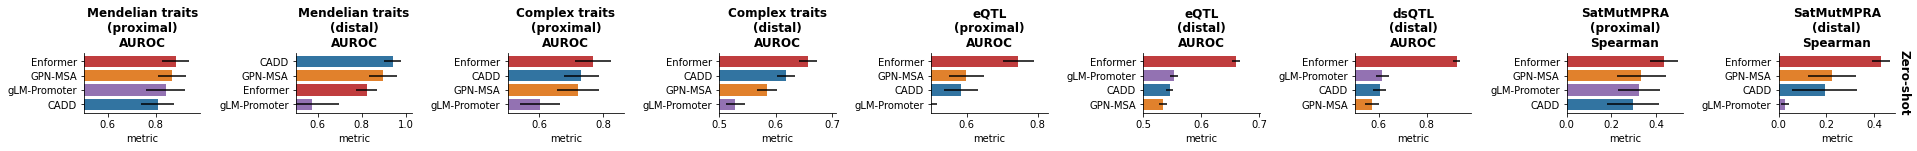

In [37]:
plot_subset("All")